In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# %cd /content/drive/My Drive/Hamoye Stage E/

In [4]:
# !ls

In [5]:
data = pd.read_csv("who_suicide_statistics.csv")

In [6]:
data.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [7]:
### Grouping by year and sex
df1 = data.groupby(['year', 'sex']).sum()[['population', 'suicides_no']]

In [8]:
#Creating a list that'll store all years dataframe.
#Each dataframe will store the ratio of male and female population to total population. It'll will do the same thing for number of suicides
dfs = []

In [16]:
#Using a pandas multi-indexing(Since we grouped, we will have a dataframe that is multi-indexed), we require a pandas multi-indexing function.
for year in range(1979,2017):
  #Finding the ratios to sum and storing values for each year in its years dataframe
    df_temp = pd.DataFrame(df1.xs(year).loc['female',:]/df1.xs(year).sum(axis=0), columns=['Female']).transpose()
    df_temp.loc['Male', :] = df1.xs(year).loc['male',:]/df1.xs(year).sum(axis=0)
    dfs.append(df_temp)

In [10]:
#Ratios for 1979
dfs[0].head()

,population,suicides_no
Female,0.50913,0.317038
Male,0.49087,0.682962


<Figure size 432x288 with 0 Axes>

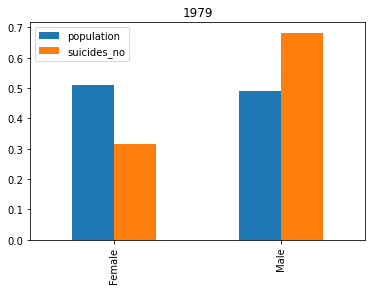

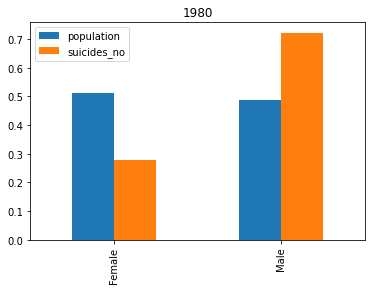

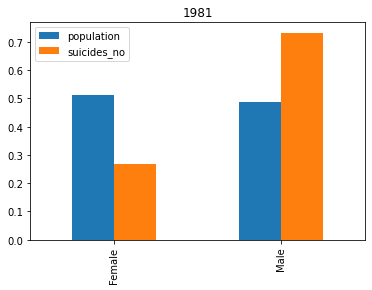

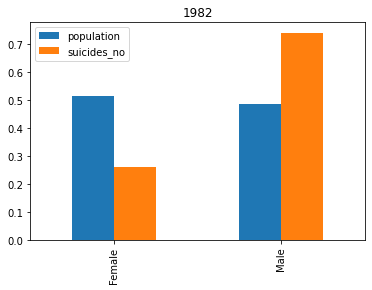

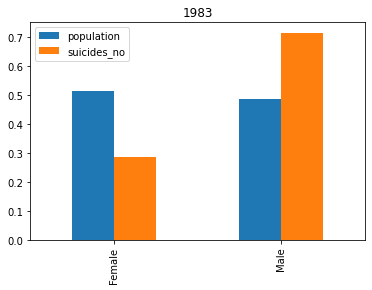

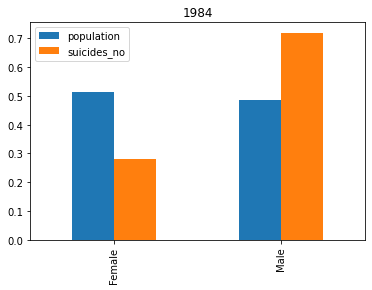

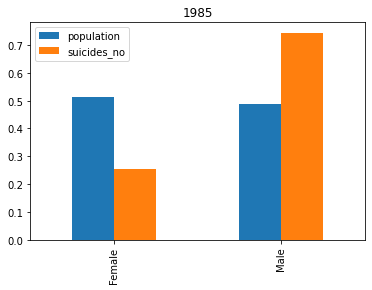

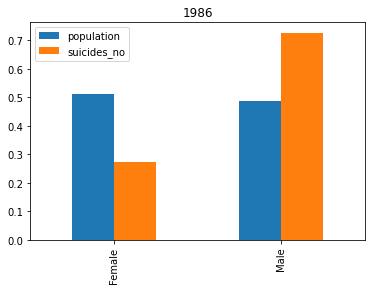

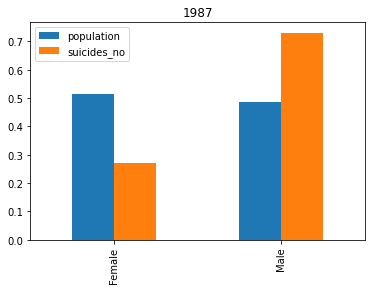

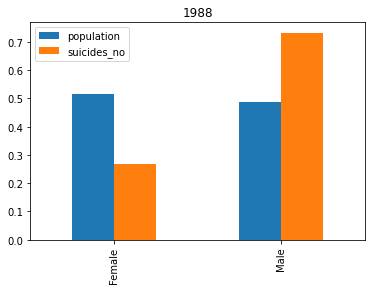

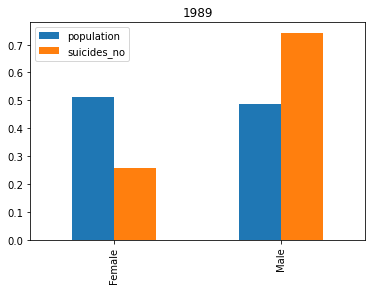

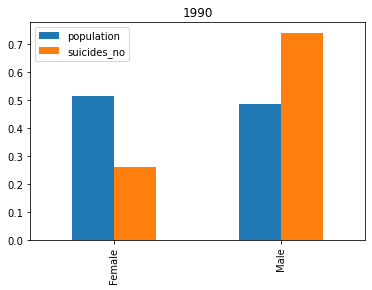

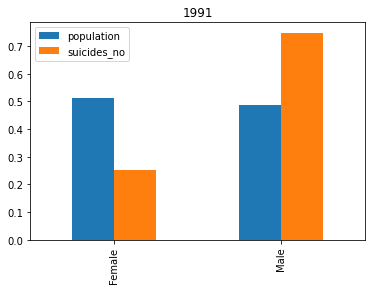

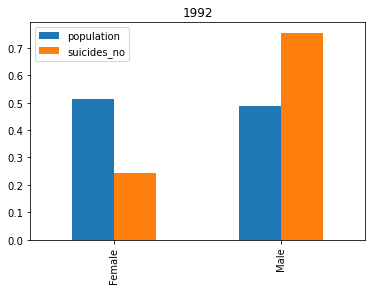

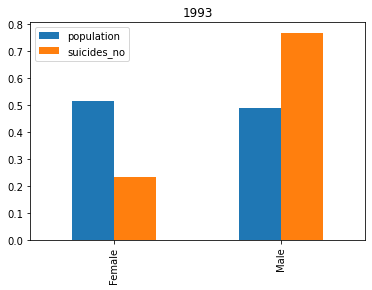

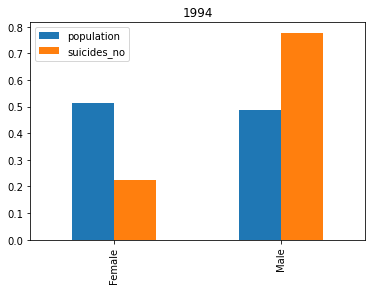

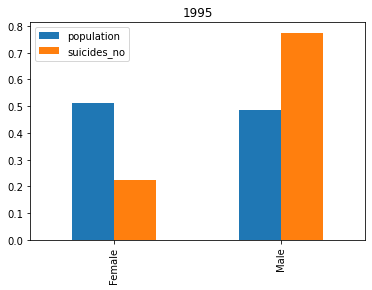

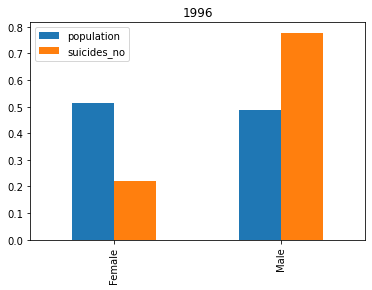

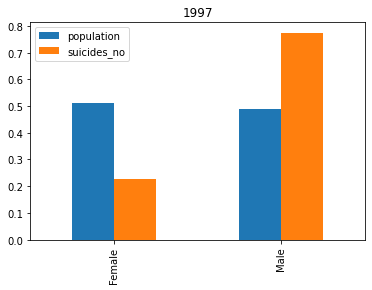

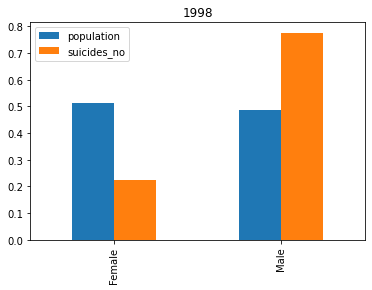

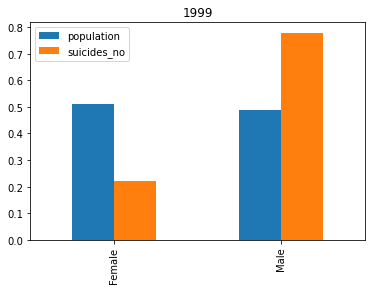

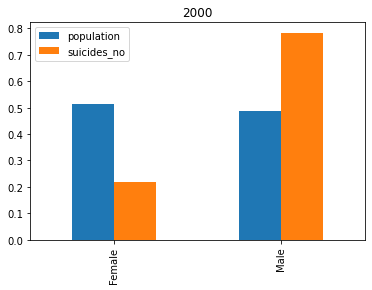

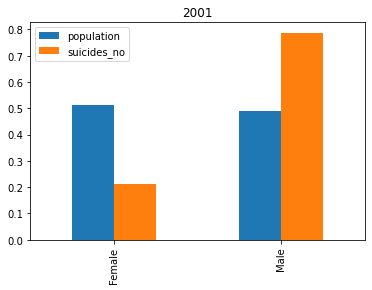

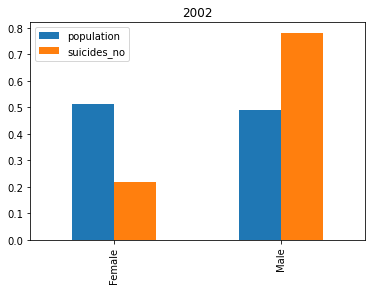

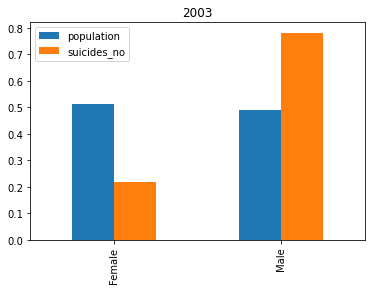

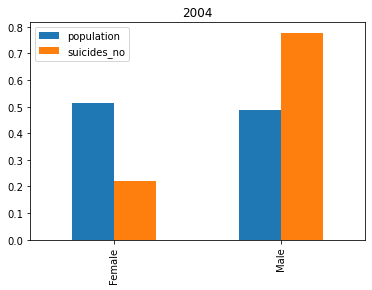

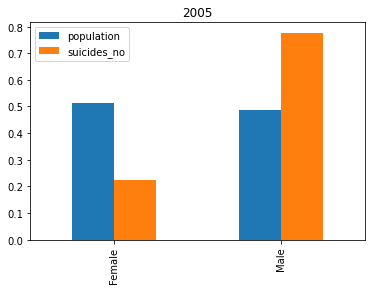

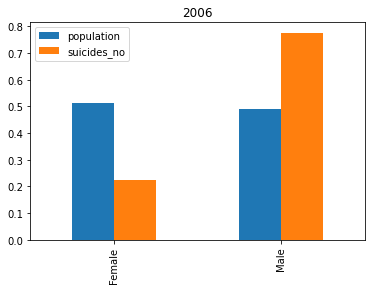

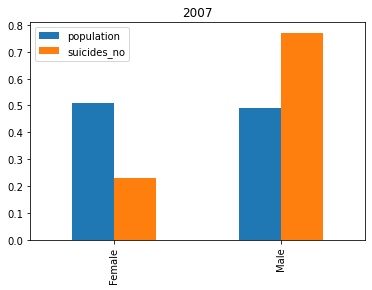

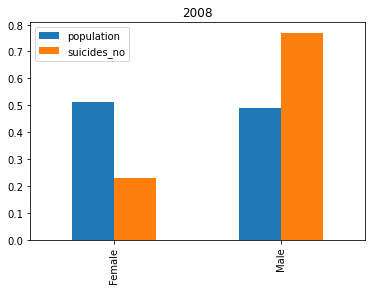

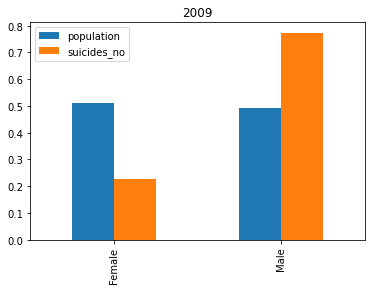

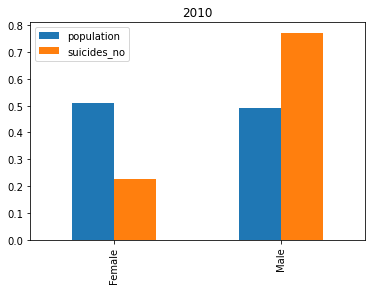

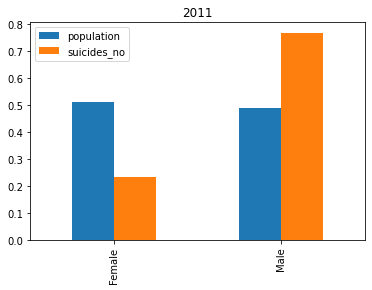

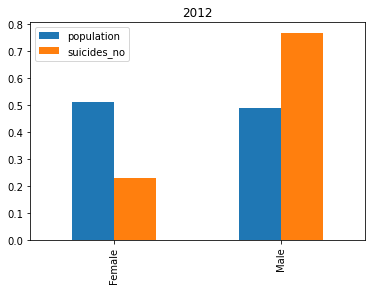

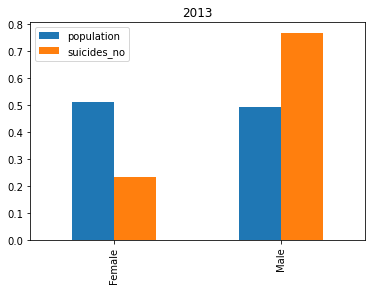

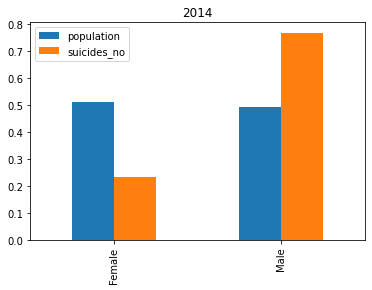

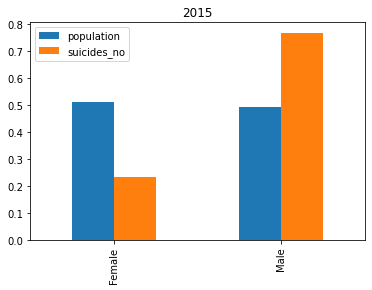

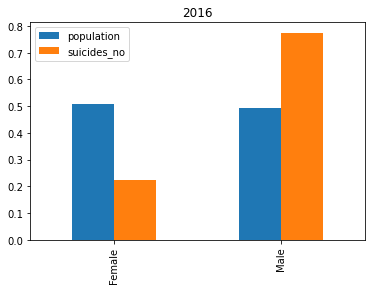

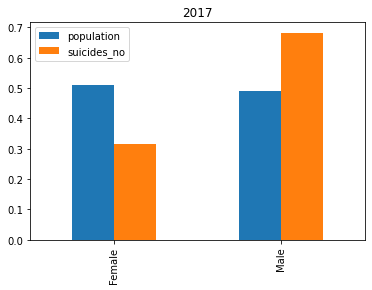

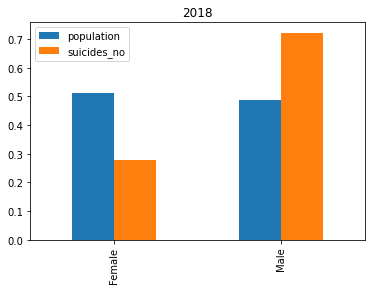

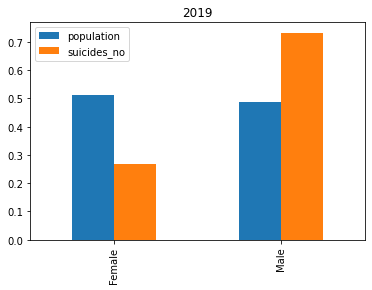

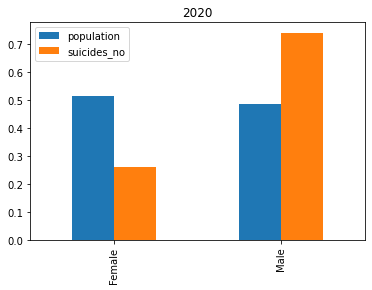

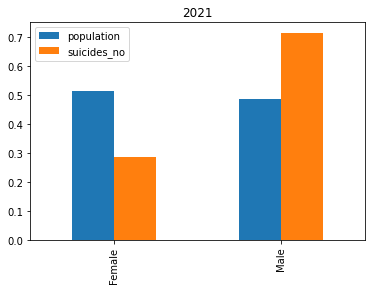

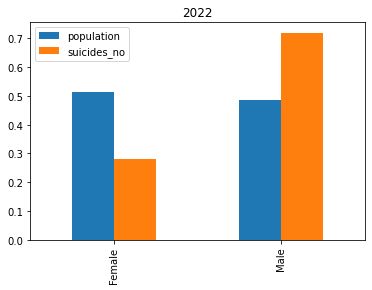

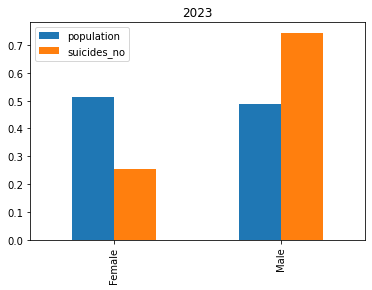

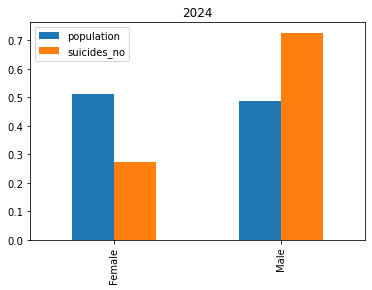

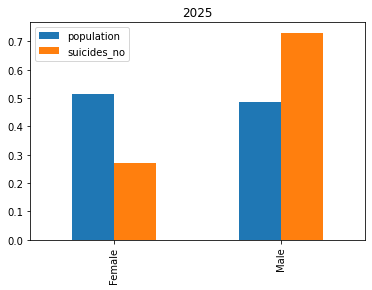

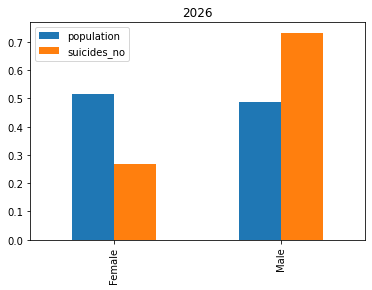

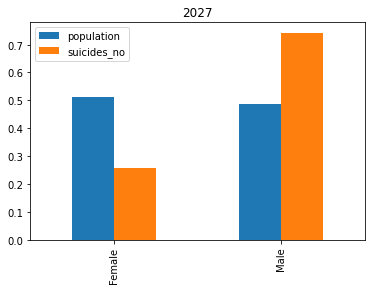

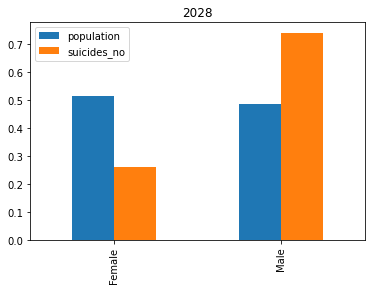

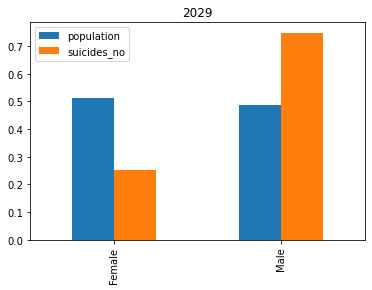

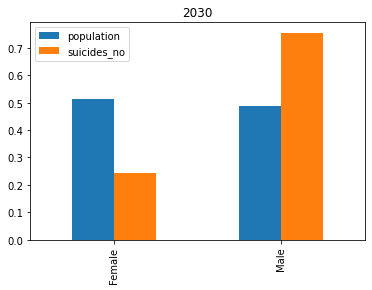

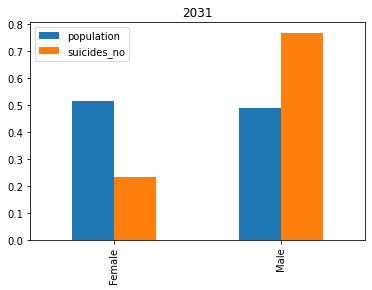

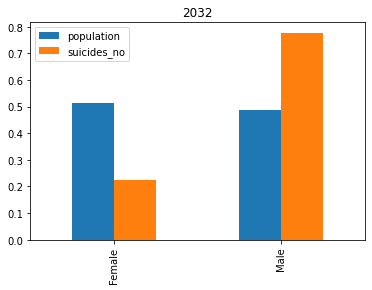

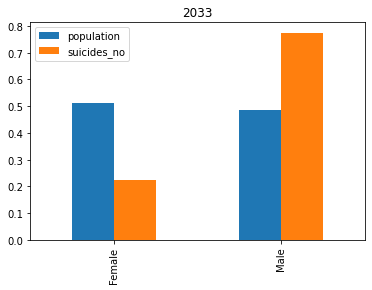

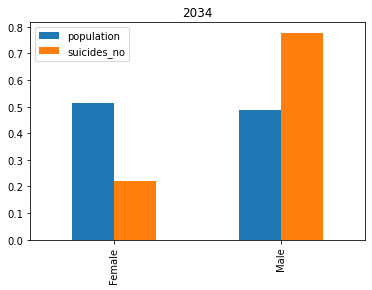

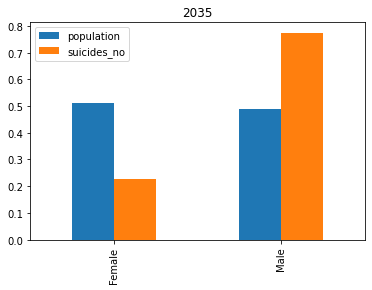

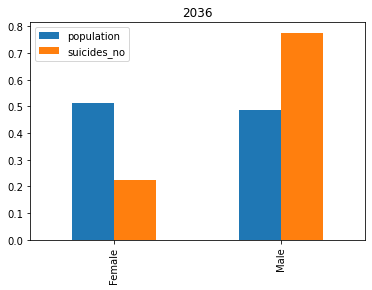

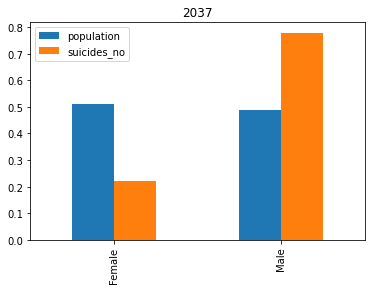

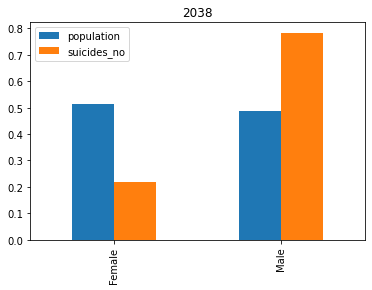

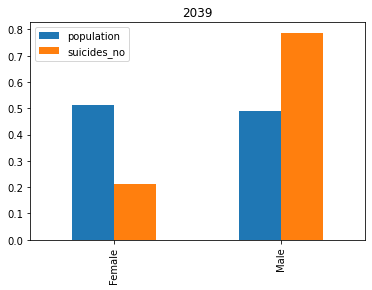

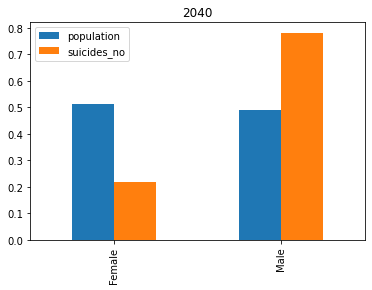

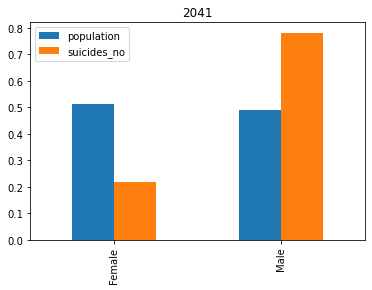

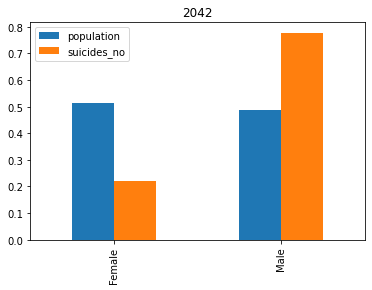

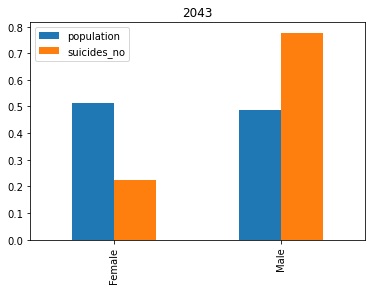

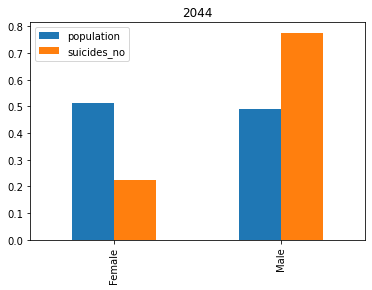

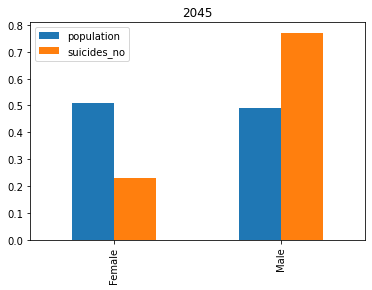

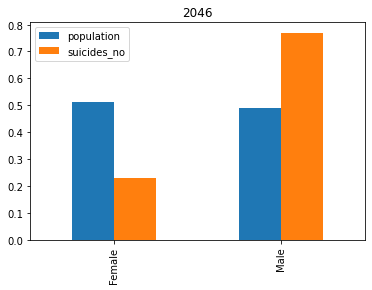

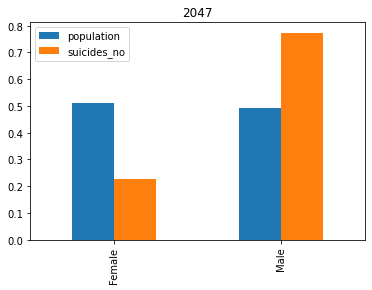

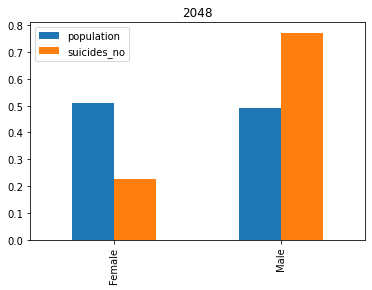

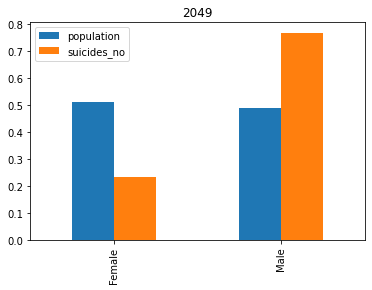

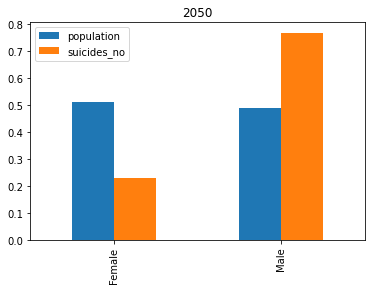

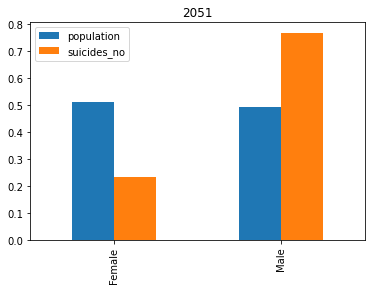

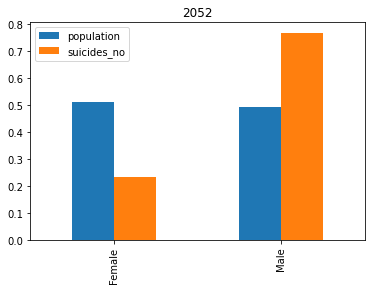

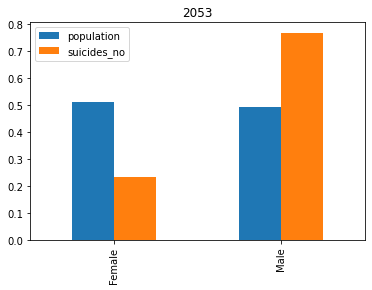

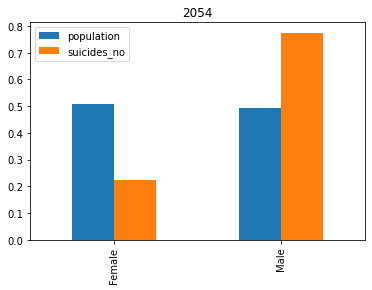

In [17]:
fig = plt.figure()
yr = 1979
for i in range(len(dfs)):
    dfs[i].plot(kind='bar', title=yr+i)

In [12]:
## From the list of bars above, it's obvious that ratio of population of men and women does't determine the ratio of suicide cases by each gender.

# ** Testing whether or  not the ratio of popluation of each age categories correlates or can be asscociated with number of suicide for each age categories.**

In [18]:
df2 = data.groupby(['year', 'age']).sum()[['population', 'suicides_no']]

In [19]:
dfs2 = []
for year in range(1979,2017):
    df_temp = pd.DataFrame(df2.xs(year).loc['5-14 years',:]/df2.xs(year).sum(axis=0), columns=['5-14 years']).transpose()
    df_temp.loc['15-24 years', :] = df2.xs(year).loc['15-24 years',:]/df2.xs(year).sum(axis=0)
    df_temp.loc['25-34 years', :] = df2.xs(year).loc['25-34 years',:]/df2.xs(year).sum(axis=0)
    df_temp.loc['35-54 years', :] = df2.xs(year).loc['35-54 years',:]/df2.xs(year).sum(axis=0)
    df_temp.loc['55-74 years', :] = df2.xs(year).loc['55-74 years',:]/df2.xs(year).sum(axis=0)
    df_temp.loc['75+ years', :] = df2.xs(year).loc['75+ years',:]/df2.xs(year).sum(axis=0)
    dfs2.append(df_temp.sort_values(by='population'))

In [20]:
dfs2[0]

,population,suicides_no
75+ years,0.037396,0.090753
55-74 years,0.153566,0.250781
25-34 years,0.166764,0.184815
15-24 years,0.195473,0.158433
5-14 years,0.206283,0.006843
35-54 years,0.240518,0.308374


C:\Users\lenovo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 432x288 with 0 Axes>

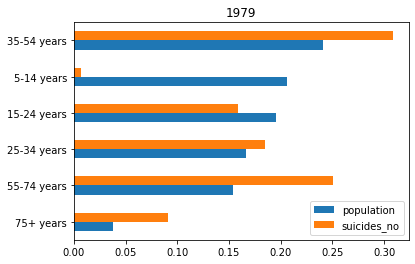

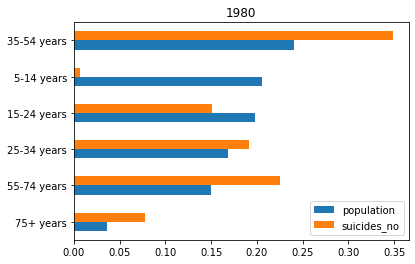

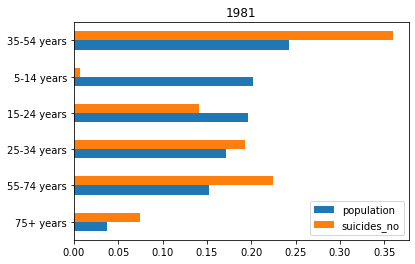

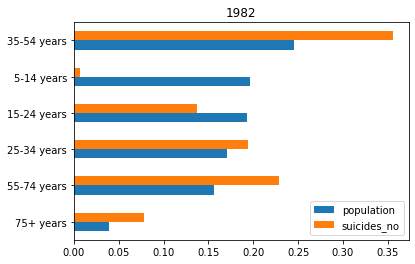

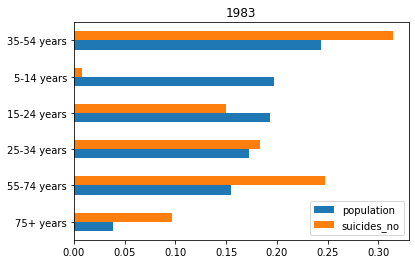

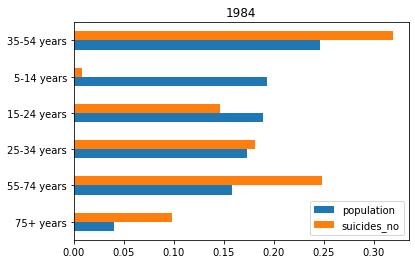

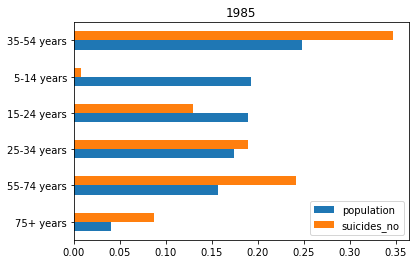

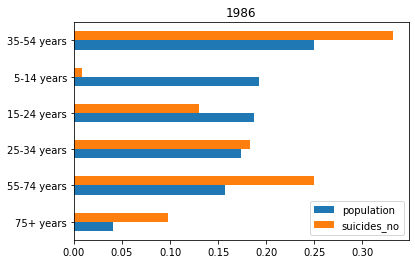

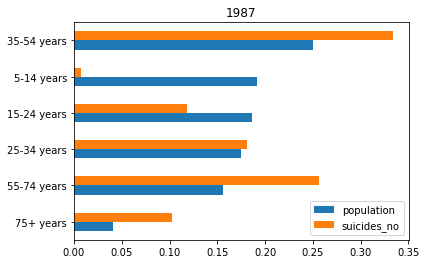

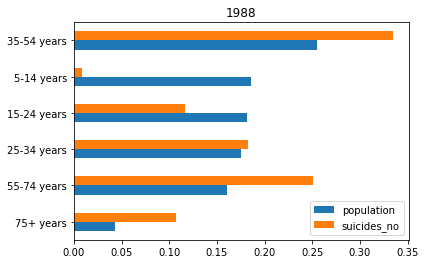

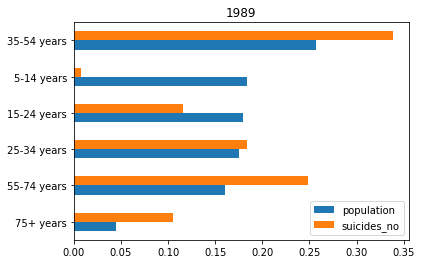

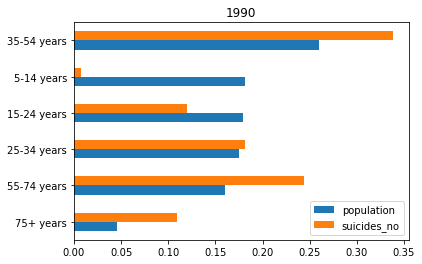

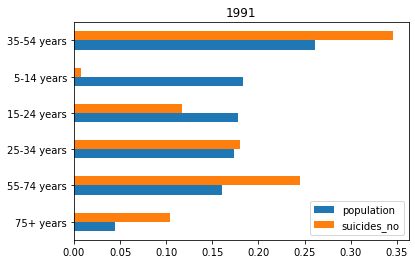

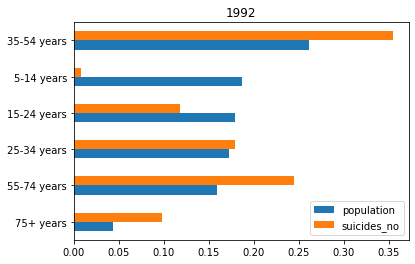

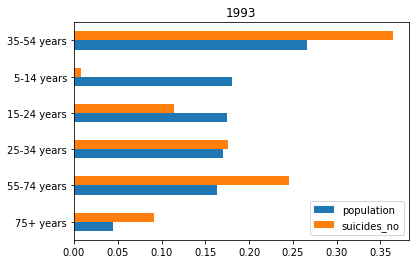

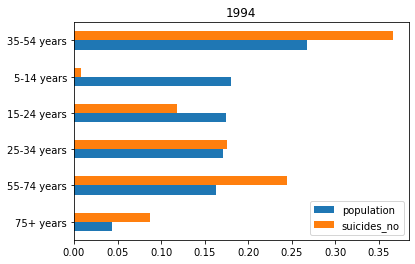

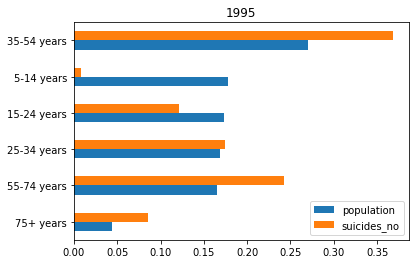

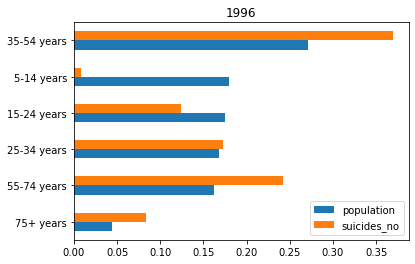

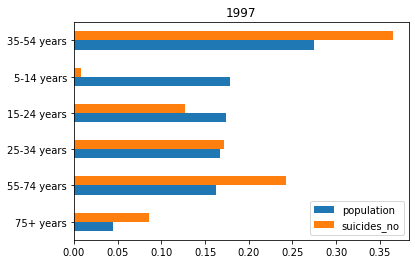

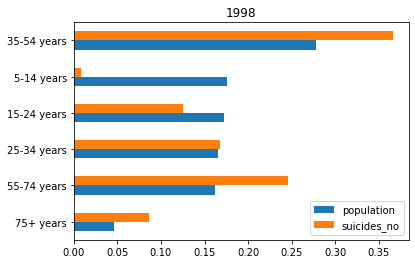

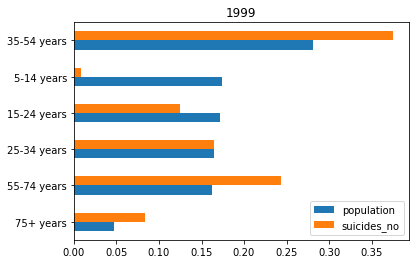

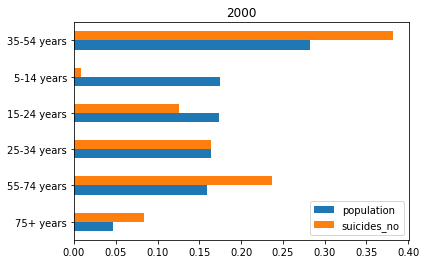

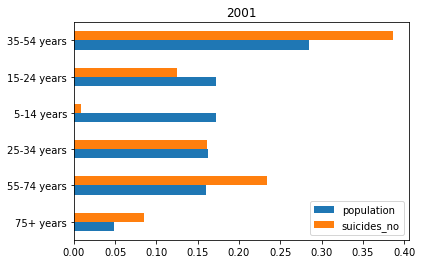

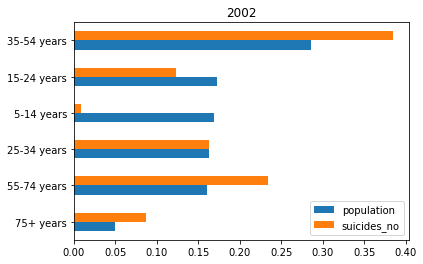

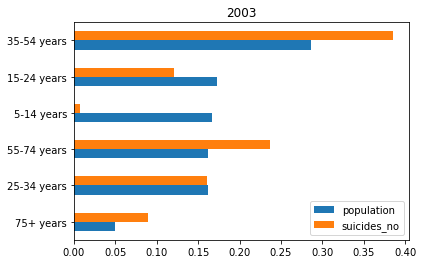

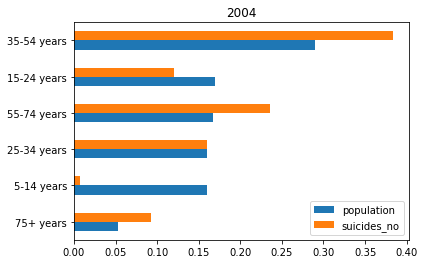

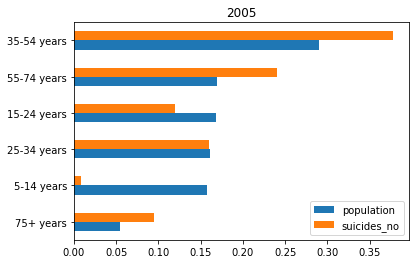

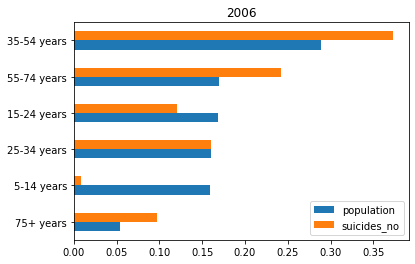

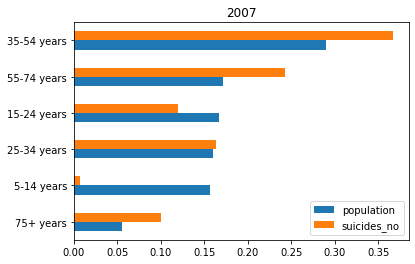

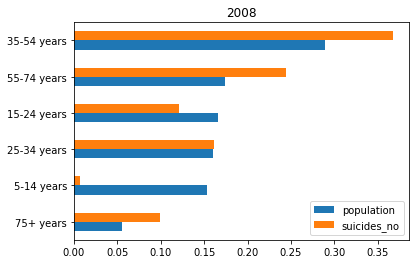

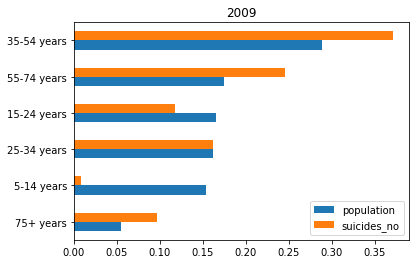

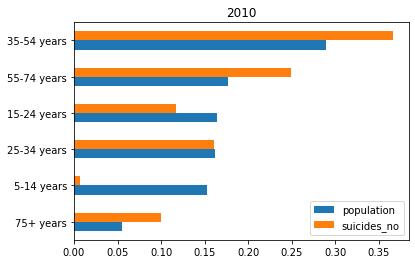

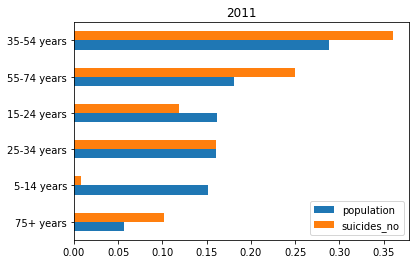

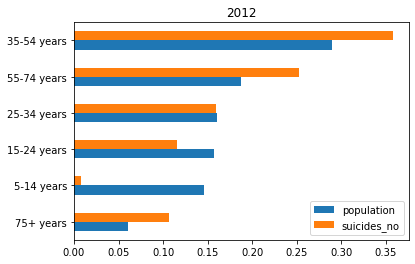

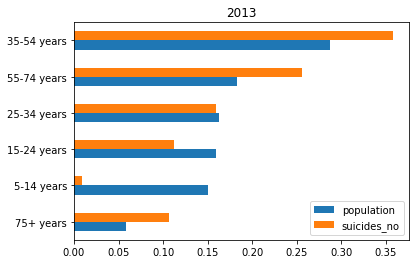

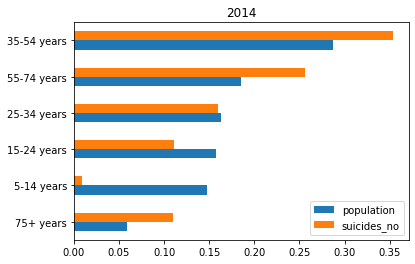

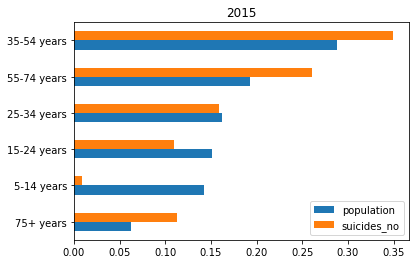

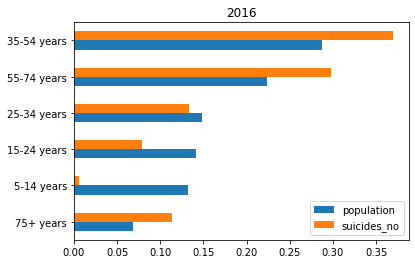

In [21]:
fig = plt.figure()
yr = 1979
for i in range(len(dfs2)):
    dfs2[i].plot(kind='barh', title=yr+i)

## From the inverted bars above, there also seems to be no relationship with ration of age categories population to ratio of suicide by each category.